In [1]:
import sys, os
sys.path.insert(0, '..')
# os.environ["CUDA_VISIBLE_DEVICES"]=""

In [2]:
import numpy as np
import pandas as pd
import torch
from models.weighted_node2vec import WeightedNode2Vec
from dataset import triplet_dataset, pokec_data
from utils.config import DEVICE
from tqdm import tqdm, trange
import gc
from utils.link_prediction import GCNLinkPrediction
import residual2vec as rv
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
gc.enable()

/data/sg/ashutiwa/miniconda3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using GPU: cuda:0


In [3]:
window_length = 5
num_walks = 10
dim = 128
walk_length = 80
NUM_WORKERS = 4

In [4]:
# d = pokec_data.PokecDataFrame()

In [5]:
embs = {}

In [6]:
embs['gcn_crosswalk'] = np.load("/data/sg/ashutiwa/residual2vec_/pokec_crosswalk_gcn_embs.npy")

In [7]:
emb = embs['gcn_crosswalk']

# distributions of positive and negative edgeswith dot product

In [8]:
a, p, n = emb[:, :128], emb[:, 128: 128 * 2], emb[:, 128 * 2:]

In [9]:
a.shape, p.shape, n.shape

((1632803, 128), (1632803, 128), (1632803, 128))

In [10]:
df = pd.DataFrame({
    "positive_dot": np.array([np.dot(a[i], p[i]) for i in trange(a.shape[0])]),
    
    "negative_dot": np.array([np.dot(a[i], n[i]) for i in trange(a.shape[0])])
})

100%|████████████████████████████| 1632803/1632803 [00:03<00:00, 418414.35it/s]


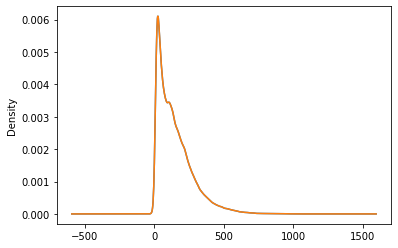

In [11]:
fig, ax = plt.subplots(1,1)
df.positive_dot.plot(kind='density')
df.negative_dot.plot(kind='density')
fig.show()

In [13]:
df.positive_dot.describe()

count    1.632803e+06
mean     1.479356e+02
std      1.276443e+02
min     -4.653814e+01
25%      4.859415e+01
50%      1.163143e+02
75%      2.099825e+02
max      1.048357e+03
Name: positive_dot, dtype: float64

In [14]:
df.negative_dot.describe()

count    1.632803e+06
mean     1.479356e+02
std      1.276443e+02
min     -4.653814e+01
25%      4.859415e+01
50%      1.163143e+02
75%      2.099825e+02
max      1.048357e+03
Name: negative_dot, dtype: float64

In [15]:
p

array([[-0.4409692 ,  0.48595253, -0.09438121, ..., -0.09403706,
        -0.02075417, -0.30607632],
       [-0.08512762, -0.33109424, -0.08568724, ..., -0.3235005 ,
        -0.17146918,  0.29333705],
       [ 0.1517711 ,  0.44269872,  0.03825224, ..., -0.10279831,
        -0.35050744, -0.19695434],
       ...,
       [-0.6271519 ,  0.51438   , -0.08930668, ..., -0.42062566,
         0.06359663, -0.00601036],
       [-0.30284345,  0.24882692, -0.11373731, ..., -0.20856792,
        -0.21802956,  0.16292256],
       [-0.6271519 ,  0.51438   , -0.08930668, ..., -0.42062566,
         0.06359663, -0.00601036]], dtype=float32)

In [16]:
n

array([[-0.4409692 ,  0.48595253, -0.09438121, ..., -0.09403706,
        -0.02075417, -0.30607632],
       [-0.08512762, -0.33109424, -0.08568724, ..., -0.3235005 ,
        -0.17146918,  0.29333705],
       [ 0.1517711 ,  0.44269872,  0.03825224, ..., -0.10279831,
        -0.35050744, -0.19695434],
       ...,
       [-0.6271519 ,  0.51438   , -0.08930668, ..., -0.42062563,
         0.06359663, -0.00601034],
       [-0.30284345,  0.24882692, -0.11373731, ..., -0.20856792,
        -0.21802956,  0.16292258],
       [-0.6271519 ,  0.51438   , -0.08930668, ..., -0.42062563,
         0.06359663, -0.00601034]], dtype=float32)